In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import sys
import random
import functions
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import csr_matrix,hstack
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from functions import *
import xgboost as xgb
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train,df_test=LoadandCleanData(True,2)

In [3]:
ids=df_train[["ID","y"]]
idstest=df_test[["ID"]]

In [4]:
toremove=list()
for name,i in zip(df_train.columns,df_train.T.duplicated()):
    if i:
        print(name)
        toremove.append(name)

In [5]:
len(toremove)

0

In [6]:
df_train.drop(toremove,axis=1,inplace=True)
df_test.drop(toremove,axis=1,inplace=True)

In [7]:
ids['rest']=ids['ID'].apply(lambda x: x%13)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Container object of 3 artists>

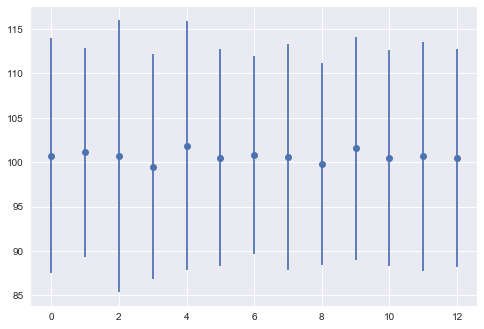

In [8]:
N=13
ids['rest']=ids['ID'].apply(lambda x: x%N)
plt.figure()
plt.errorbar(x=np.mgrid[0:N:1],y=ids.groupby(['rest']).mean()['y'],yerr=ids.groupby(['rest']).std()['y'],fmt='o')

In [9]:
ids.groupby("rest").std()

,ID,y
rest,,
0,2407.804394,13.204963
1,2483.779378,11.748017
2,2420.353487,15.310793
3,2468.615806,12.693617
4,2481.622655,14.018278
5,2428.390619,12.260222
6,2364.385755,11.174080
7,2459.146803,12.733032
8,2472.895267,11.406448


In [10]:
ids.groupby("rest").count()

,ID,y
rest,,
0,321,321
1,334,334
2,326,326
3,318,318
4,317,317
5,334,334
6,326,326
7,294,294
8,326,326


<Container object of 3 artists>

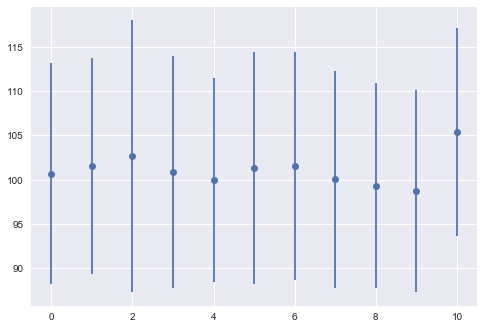

In [11]:
N=420
plt.figure()
plt.errorbar(x=np.mgrid[0:len(ids)/N:1],y=ids.groupby(np.arange(len(ids))//N).mean()['y'],yerr=ids.groupby(np.arange(len(ids))//N).std()['y'],fmt='o')
  

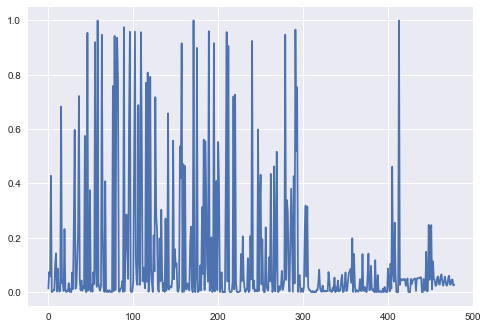

In [12]:
#df_train.sum()
plt.plot(df_train.drop(["ID","y"],axis=1).sum().values/len(df_train))

In [13]:
for i in df_train.drop(["ID","y"],axis=1).sum():
    print(i)

56
316
244
1802
2
11
32
33
419
601
11
366
87
8
21
2873
137
181
19
978
47
1
23
19
140
3
48
1
304
48
1066
2514
54
94
514
901
3038
178
29
183
22
89
56
2420
3
6
4015
25
48
1579
9
114
8
309
126
3872
436
84
4206
152
53
24
106
3986
964
72
5
1718
6
4
30
3
31
7
4
1
3191
18
3967
36
2905
3938
3302
8
10
55
62
170
4
4103
12
615
1202
828
207
2619
4031
11
2
13
164
2084
4034
516
175
112
2898
523
114
4026
2449
172
381
170
60
3242
161
3401
6
189
3335
360
136
3
879
322
3019
1190
967
57
5
832
172
1277
263
19
140
4
1140
28
102
2767
41
73
94
72
211
2346
202
665
395
447
17
6
79
2256
1770
3853
1
1982
10
1953
49
43
136
97
28
748
1016
71
1
4208
81
1
265
3782
1
63
23
415
31
1315
284
2362
34
2337
1336
408
164
4041
22
68
849
2
28
3856
12
409
1723
32
2327
1659
3
82
308
1
10
1
1
1766
4028
166
3811
38
2
1
9
158
3031
42
3059
162
6
2
1
11
17
592
173
866
230
67
1
44
38
526
1
19
871
197
3890
56
184
9
40
30
11
2519
18
1267
1817
121
823
32
3
2
1005
92
39
24
540
169
1832
236
3
101
1947
15
536
2174
29
1
94
34
94
330
36
94
20

In [14]:
type(df_train.drop(["ID","y"],axis=1).sum())

pandas.core.series.Series

In [15]:
for i,k in zip(df_train.drop(["ID","y"],axis=1).columns,(df_train.drop(["ID","y"],axis=1).sum()/len(df_train)).between(0.1,0.9)):
    if k:
        print(i,k)

X14 True
X20 True
X27 True
X31 True
X45 True
X46 True
X49 True
X50 True
X51 True
X58 True
X64 True
X71 True
X81 True
X85 True
X96 True
X100 True
X103 True
X114 True
X115 True
X116 True
X118 True
X127 True
X129 True
X132 True
X133 True
X137 True
X142 True
X144 True
X150 True
X154 True
X156 True
X157 True
X158 True
X161 True
X163 True
X168 True
X171 True
X178 True
X180 True
X182 True
X186 True
X187 True
X191 True
X194 True
X201 True
X202 True
X209 True
X218 True
X220 True
X223 True
X224 True
X234 True
X246 True
X250 True
X251 True
X261 True
X273 True
X275 True
X283 True
X285 True
X294 True
X300 True
X311 True
X313 True
X314 True
X316 True
X321 True
X327 True
X329 True
X334 True
X336 True
X337 True
X350 True
X351 True
X354 True
X355 True
X356 True
X358 True
X362 True
X363 True
X374 True
X375 True
X377 True
X1_11 True
X1_17 True
X1_3 True
X1_5 True
X2_30 True
X3_2 True
X3_4 True
X3_5 True
X6_0 True
X6_10 True
X6_8 True
X6_11 True
X6_1 True


In [16]:
df_train.drop(["ID","y"],axis=1).sum()/len(df_train)

X10      0.013305
X12      0.075077
X13      0.057971
X14      0.428130
X15      0.000475
X16      0.002613
X17      0.007603
X18      0.007840
X19      0.099549
X20      0.142789
X21      0.002613
X22      0.086957
X23      0.020670
X24      0.001901
X26      0.004989
X27      0.682585
X28      0.032549
X29      0.043003
X30      0.004514
X31      0.232359
X32      0.011167
X33      0.000238
X34      0.005464
X36      0.004514
X38      0.033262
X40      0.000713
X41      0.011404
X42      0.000238
X43      0.072226
X44      0.011404
           ...   
X6_7     0.045141
X6_8     0.115942
X6_11    0.246852
X6_4     0.010216
X6_1     0.113566
X8_20    0.049893
X8_2     0.045141
X8_12    0.023759
X8_5     0.024471
X8_21    0.053457
X8_9     0.057733
X8_4     0.030886
X8_11    0.027798
X8_16    0.056308
X8_17    0.065811
X8_18    0.041815
X8_10    0.023996
X8_23    0.036826
X8_22    0.057496
X8_7     0.038727
X8_13    0.023759
X8_19    0.027798
X8_0     0.052031
X8_8     0.060584
X8_24    0

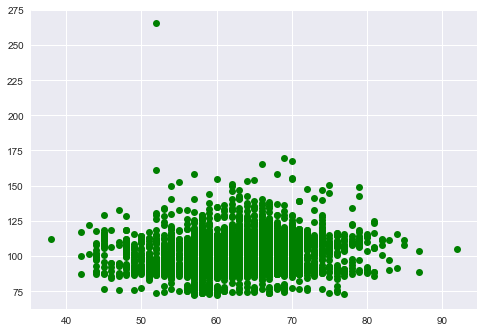

In [17]:
plt.plot(df_train.drop(['ID','y'],axis=1).sum(axis=1),df_train['y'].values,'go')

In [18]:
df_train.columns

Index(['ID', 'y', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X8_13', 'X8_19', 'X8_0', 'X8_8', 'X8_24', 'X8_6', 'X8_3', 'X8_14',
       'X8_1', 'X8_15'],
      dtype='object', length=481)

In [19]:
ids

,ID,y,rest
0,0,130.81,0
1,6,88.53,6
2,7,76.26,7
3,9,80.62,9
4,13,78.02,0
5,18,92.93,5
6,24,128.76,11
7,25,91.91,12
8,27,108.67,1
9,30,126.99,4


In [20]:
N=100
for i in ids.groupby(np.arange(len(ids))//N):
    print(type(i))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [34]:
N=2000
nids=len(ids)//N
N,nids,len(ids)

(2000, 2, 4209)

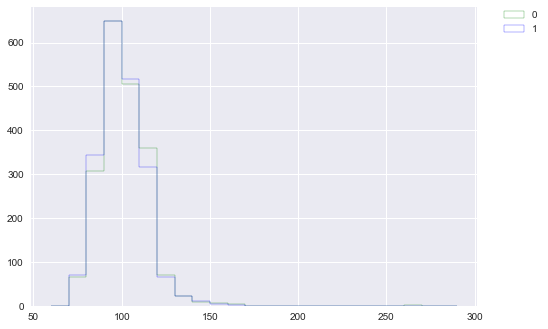

In [35]:
colors=["green","blue","red","black"]
for i in range(nids):
    plt.hist(ids['y'].values[i*N:min((i+1)*N,len(ids)-1)],bins=np.mgrid[60:300:10],color=colors[i],histtype="step",normed=0,label="{}".format(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
a=[1,2,45,67,89,2]

In [24]:
a[1:3]

[2, 45]

In [25]:
a[3:5]

[67, 89]

In [26]:
i=0
ids['y'].values[i*N:min((i+1)*N,len(ids)-1)]

array([ 130.81,   88.53,   76.26,   80.62,   78.02,   92.93,  128.76,
         91.91,  108.67,  126.99,  102.09,   98.12,   82.62,   94.12,
         99.15,   93.64,  106.1 ,  114.13,   89.81,   90.81,   90.56,
         94.57,  108.14,  120.77,   84.84,   93.59,  104.07,   89.37,
         90.08,  128.19,   76.01,  107.86,  106.87,  104.85,  114.78,
         91.56,   98.16,  117.31,   79.  ,  110.76,  101.44,   91.98,
         98.08,  139.2 ,   85.44,  110.52,   91.44,   91.52,   91.59,
        108.  ,  116.59,   93.81,  119.44,   91.57,   97.24,   90.11,
         94.83,  108.42,   95.57,   88.82,  104.78,   87.75,   93.27,
        111.74,  109.76,   84.15,   93.67,  107.72,   90.87,  118.24,
         89.91,  113.4 ,  118.53,   79.03,   92.47,  100.98,  114.76,
        111.15,  108.57,   93.03,   93.12,  113.31,   94.27,  102.31,
        101.59,  110.37,   98.84,  101.98,   96.96,   90.8 ,  110.98,
         73.7 ,  111.42,   98.91,  106.46,  115.43,   91.94,  108.37,
        127.66,   93

In [27]:
colors=[i for i in matplotlib.colors.cnames.keys()]
